In [2]:
from PyNite import FEModel3D
from PyNite.Visualization import render_model
from math import sqrt
from math import tan
from math import radians

In [7]:
def frame_cal(H, L, w, ang_d):
    """
    H, l, w, ang_d
    """
    
    frame_model = FEModel3D() # Creates an empty model
    H  # mm
    L  # mm
    w  # N/mm
    ang = radians (ang_d) # rad

    #Add nodes
    frame_model.add_node("node1",0,0,0)
    frame_model.add_node("node2",0,H,0)
    frame_model.add_node("node3",L/2,H+((L/2)*tan(ang)),0)
    frame_model.add_node("node4",L,H,0)
    frame_model.add_node("node5",L,0,0)

    m = (L/2)**2 + 500**2
    member_length = sqrt(m)

    #Define material
    I_1 = 9050000.0 # mm*4
    I_2 = 672000.0 # mm*4
    J = 60500.0 # mm*4
    A = 2300 # mm*2
    frame_model.add_material(name='Steel', E=200e3, G=80e3, nu=0.25, rho=7.85e-6)
    
    #Add frame members
    frame_model.add_member('M1', 'node1', 'node2', 'Steel', I_2, I_1, J, A)
    frame_model.add_member('M2', 'node2', 'node3', 'Steel', I_2, I_1, J, A)
    frame_model.add_member('M3', 'node3', 'node4', 'Steel', I_2, I_1, J, A)
    frame_model.add_member('M4', 'node4', 'node5', 'Steel', I_2, I_1, J, A)
    
    #Add load
    frame_model.add_load_combo('L',{"D":1})
    frame_model.add_member_dist_load("M1", "Fy", -w, -w, 0, H, case="D")
    frame_model.add_member_dist_load("M2", "Fy", -w, -w, 0, member_length, case="D")
    frame_model.add_member_dist_load("M3", "Fy", -w, -w, 0, member_length, case="D")
    frame_model.add_member_dist_load("M4", "Fy", w, w, 0, H, case="D")

    #Add boundary condition
    frame_model.def_support('node1', True, True, True, True, True, True)
    frame_model.def_support('node5', True, True, True, True, True, True)
    
    render_model(frame_model, combo_name="L", annotation_size=300)
    #Submit for analysis
    frame_model.analyze_linear()

    #Vertical Displacement
    displ_vmax_1 = abs(frame_model.Members['M1'].max_deflection('dy', combo_name="L"))
    displ_vmax_2 = abs(frame_model.Members['M2'].max_deflection('dy', combo_name="L"))
    displ_vmax_3 = abs(frame_model.Members['M3'].max_deflection('dy', combo_name="L"))
    displ_vmax_4 = abs(frame_model.Members['M4'].max_deflection('dy', combo_name="L"))
    displ_vmin_1 = abs(frame_model.Members['M1'].min_deflection('dy', combo_name="L"))
    displ_vmin_2 = abs(frame_model.Members['M2'].min_deflection('dy', combo_name="L"))
    displ_vmin_3 = abs(frame_model.Members['M3'].min_deflection('dy', combo_name="L"))
    displ_vmin_4 = abs(frame_model.Members['M4'].min_deflection('dy', combo_name="L"))
    
    displ_v = max(displ_vmax_1, displ_vmax_2, displ_vmax_3, displ_vmax_4, displ_vmin_1, displ_vmin_2, displ_vmin_3, displ_vmin_4)
    
    #frame_model.Members['M1'].plot_deflection(A, combo_name="L", n_points =10000)
    #frame_model.Members['M2'].plot_deflection(A, combo_name="L", n_points =10000)
    #frame_model.Members['M3'].plot_deflection(A, combo_name="L", n_points =10000)
    #frame_model.Members['M4'].plot_deflection(A, combo_name="L", n_points =10000)
    
    #max momemnt
    moment_max_1=abs(frame_model.Members['M1'].max_moment('Mz', combo_name = 'L')/10**6)
    moment_max_2=abs(frame_model.Members['M2'].max_moment('Mz', combo_name = 'L')/10**6)
    moment_max_3=abs(frame_model.Members['M3'].max_moment('Mz', combo_name = 'L')/10**6)
    moment_max_4=abs(frame_model.Members['M4'].max_moment('Mz', combo_name = 'L')/10**6)
    #min moment
    moment_min_1=abs(frame_model.Members['M1'].min_moment('Mz', combo_name = 'L')/10**6)
    moment_min_2=abs(frame_model.Members['M2'].min_moment('Mz', combo_name = 'L')/10**6)
    moment_min_3=abs(frame_model.Members['M3'].min_moment('Mz', combo_name = 'L')/10**6)
    moment_min_4=abs(frame_model.Members['M4'].min_moment('Mz', combo_name = 'L')/10**6)
    moment = max (moment_max_1, moment_max_2, moment_max_3, moment_max_4, moment_min_1, moment_min_2, moment_min_3, moment_min_4)

    #max shear
    shear_max_1=abs(frame_model.Members['M1'].max_shear('Fy', combo_name = 'L')/10**3)
    shear_max_2=abs(frame_model.Members['M2'].max_shear('Fy', combo_name = 'L')/10**3)
    shear_max_3=abs(frame_model.Members['M3'].max_shear('Fy', combo_name = 'L')/10**3)
    shear_max_4=abs(frame_model.Members['M4'].max_shear('Fy', combo_name = 'L')/10**3)
    #min shear
    shear_min_1=abs(frame_model.Members['M1'].min_shear('Fy', combo_name = 'L')/10**3)
    shear_min_2=abs(frame_model.Members['M2'].min_shear('Fy', combo_name = 'L')/10**3)
    shear_min_3=abs(frame_model.Members['M3'].min_shear('Fy', combo_name = 'L')/10**3)
    shear_min_4=abs(frame_model.Members['M4'].min_shear('Fy', combo_name = 'L')/10**3)
    shear = max(shear_max_1, shear_max_2, shear_max_3, shear_max_4, shear_min_1, shear_min_2, shear_min_3, shear_min_4)
    
    return moment, shear, displ_v

In [8]:
frame_cal(3000, 11573, 2.1, 10)[2]

46.2916207680447

In [5]:
frame_cal(3000, 11573, 2.1, 10)

(20.715592707346964, 16.302520733923863, 46.2916207680447)

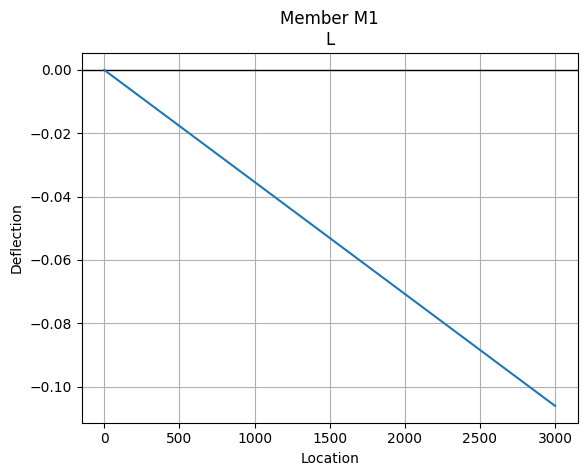

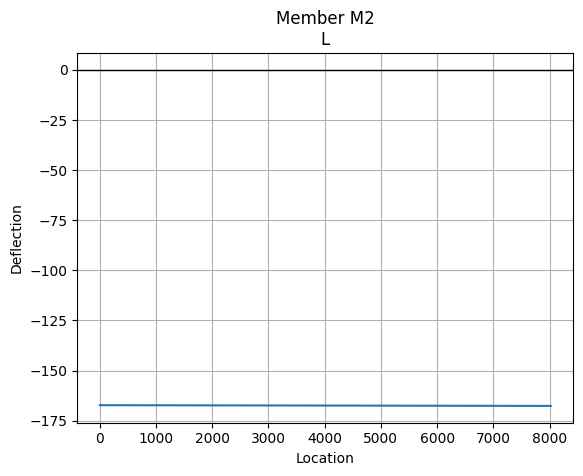

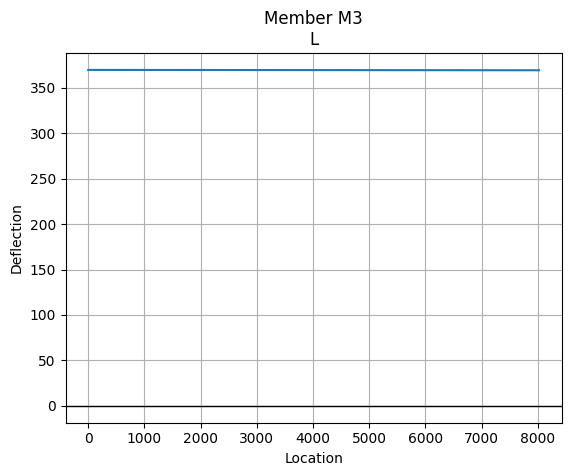

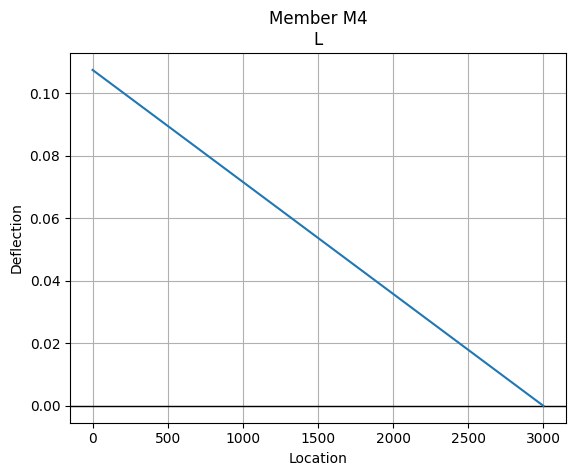

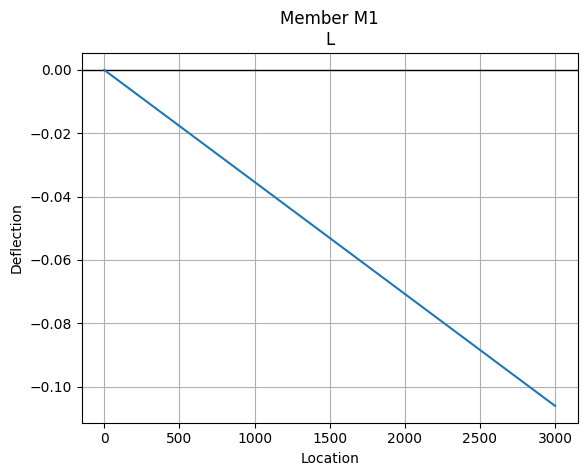

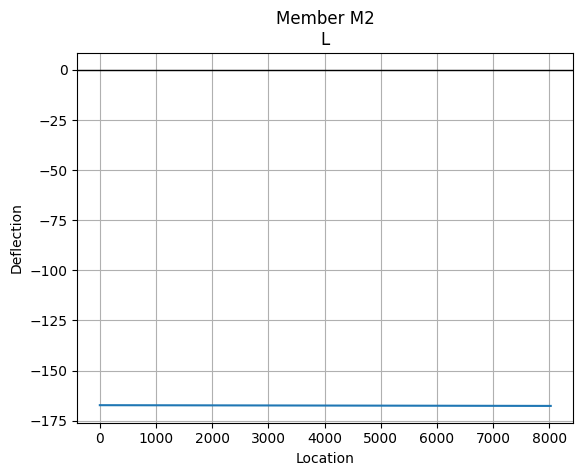

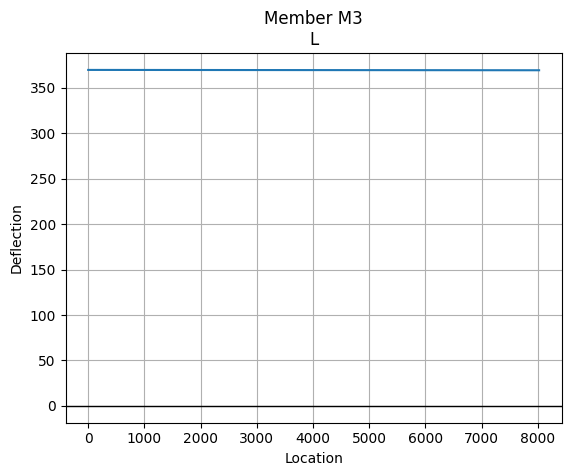

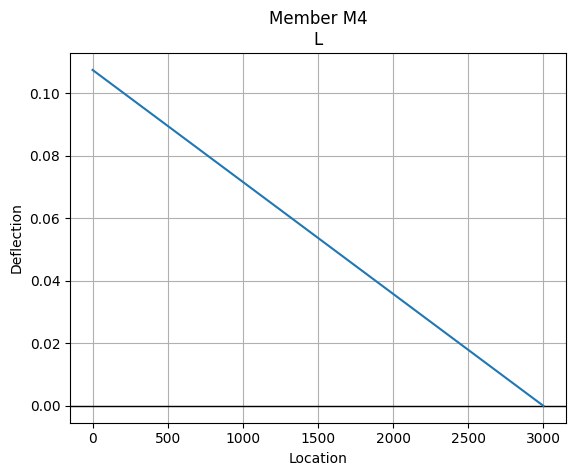

KeyboardInterrupt: 

In [64]:
L = 15800
M = 0
while M <= 35.03:
    M = frame_cal(3000, L, 2.1, 10)[0]
    L+=1
print ('Moment criteria: ',L-1, M)

L = 54000
S = 0
while S <= 146.88:
    S = frame_cal(3000, L, 2.1, 10)[1]
    L+=1
print ('Shear criteria:',L-1, S)    

In [122]:
L = 11460
V = 0
V_c = L/250
while V <= V_c:
    V = frame_cal(3000, L, 2.1, 10)[2]
    L+=1
    V_c = L/250
print ('Vertical displacment criteria: ',L-1, V, V_c)

Vertical displacment criteria:  11574 46.303628778739395 46.3
